In [27]:
import numpy as np

In [28]:
import os

In [29]:
print(os.getcwd())

/content


In [4]:
from google.colab import files
uploaded = files.upload()

Saving austo_automobile .csv to austo_automobile .csv


In [30]:
import pandas as pd

In [31]:
data = pd.read_csv("austo_automobile .csv")

In [32]:
data.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


In [34]:
print(data.dtypes)

Age                   int64
Gender               object
Profession           object
Marital_status       object
Education            object
No_of_Dependents      int64
Personal_loan        object
House_loan           object
Partner_working      object
Salary                int64
Partner_salary      float64
Total_salary          int64
Price                 int64
Make                 object
dtype: object


# Check for missing values

In [35]:
print(data.isnull().sum())

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64


# Check the statistical summary

In [36]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1581.0,NaN,NaN,NaN,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
Gender,1528,4,Male,1199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,1581,2,Salaried,896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_status,1581,2,Married,1443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,1581,2,Post Graduate,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_Dependents,1581.0,NaN,NaN,NaN,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Personal_loan,1581,2,Yes,792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
House_loan,1581,2,No,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner_working,1581,2,Yes,868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,1581.0,NaN,NaN,NaN,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0


# Identify unique values in 'Gender' to check for misspellings

In [37]:
print(data['Gender'].unique())

['Male' 'Femal' 'Female' nan 'Femle']


In [38]:
data['Gender'] = data['Gender'].replace({'Femal': 'Female', 'Femle': 'Female'})

In [39]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])

In [40]:
print(data['Gender'].unique())

['Male' 'Female']


In [41]:
print(data['Gender'].value_counts())

Gender
Male      1252
Female     329
Name: count, dtype: int64


# Treat missing values in 'Partner_salary' by imputing with the median

In [42]:
data['Partner_salary'] = data['Partner_salary'].fillna(data['Partner_salary'].median())

In [43]:
print(data.isnull().sum())

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64


Univariate Analysis

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
sns.set_style("whitegrid")

In [46]:
numerical_cols = data.select_dtypes(include=np.number).columns
categorical_cols = data.select_dtypes(include='object').columns

In [47]:
print(f"\nNumerical columns: {list(numerical_cols)}")
print(f"Categorical columns: {list(categorical_cols)}")


Numerical columns: ['Age', 'No_of_Dependents', 'Salary', 'Partner_salary', 'Total_salary', 'Price']
Categorical columns: ['Gender', 'Profession', 'Marital_status', 'Education', 'Personal_loan', 'House_loan', 'Partner_working', 'Make']


# Univariate Analysis - Numerical Variables


Univariate Analysis - Numerical Variables:


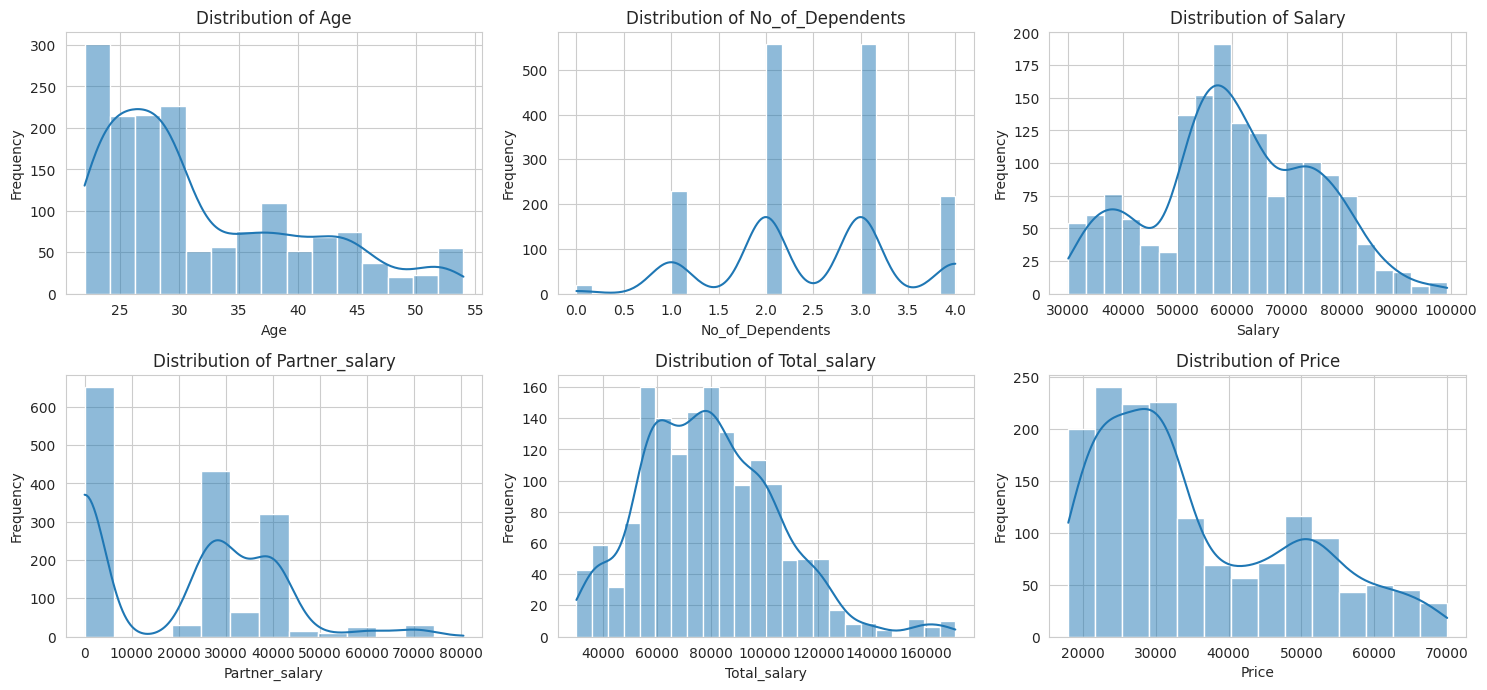

In [48]:
print("\nUnivariate Analysis - Numerical Variables:")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

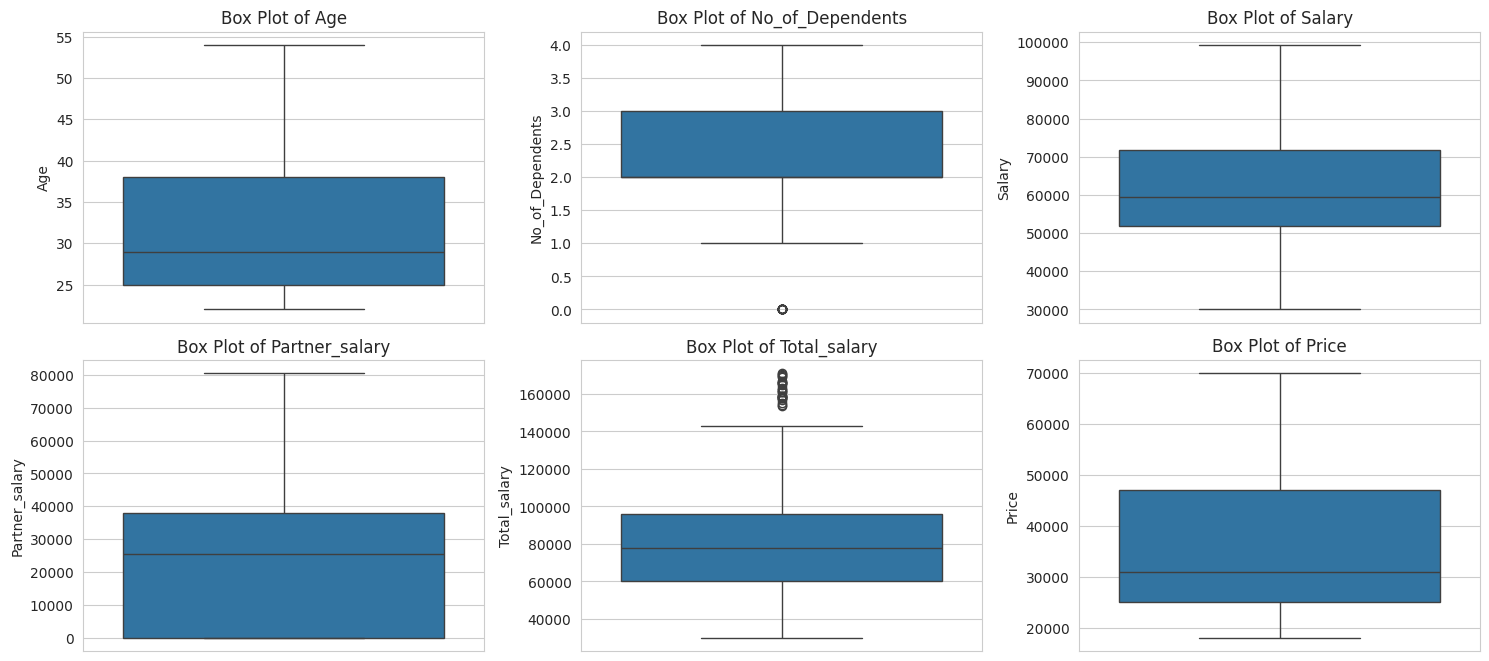

In [49]:
# Box plots to check for outliers in numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Univariate Analysis - Categorical Variables


Univariate Analysis - Categorical Variables:


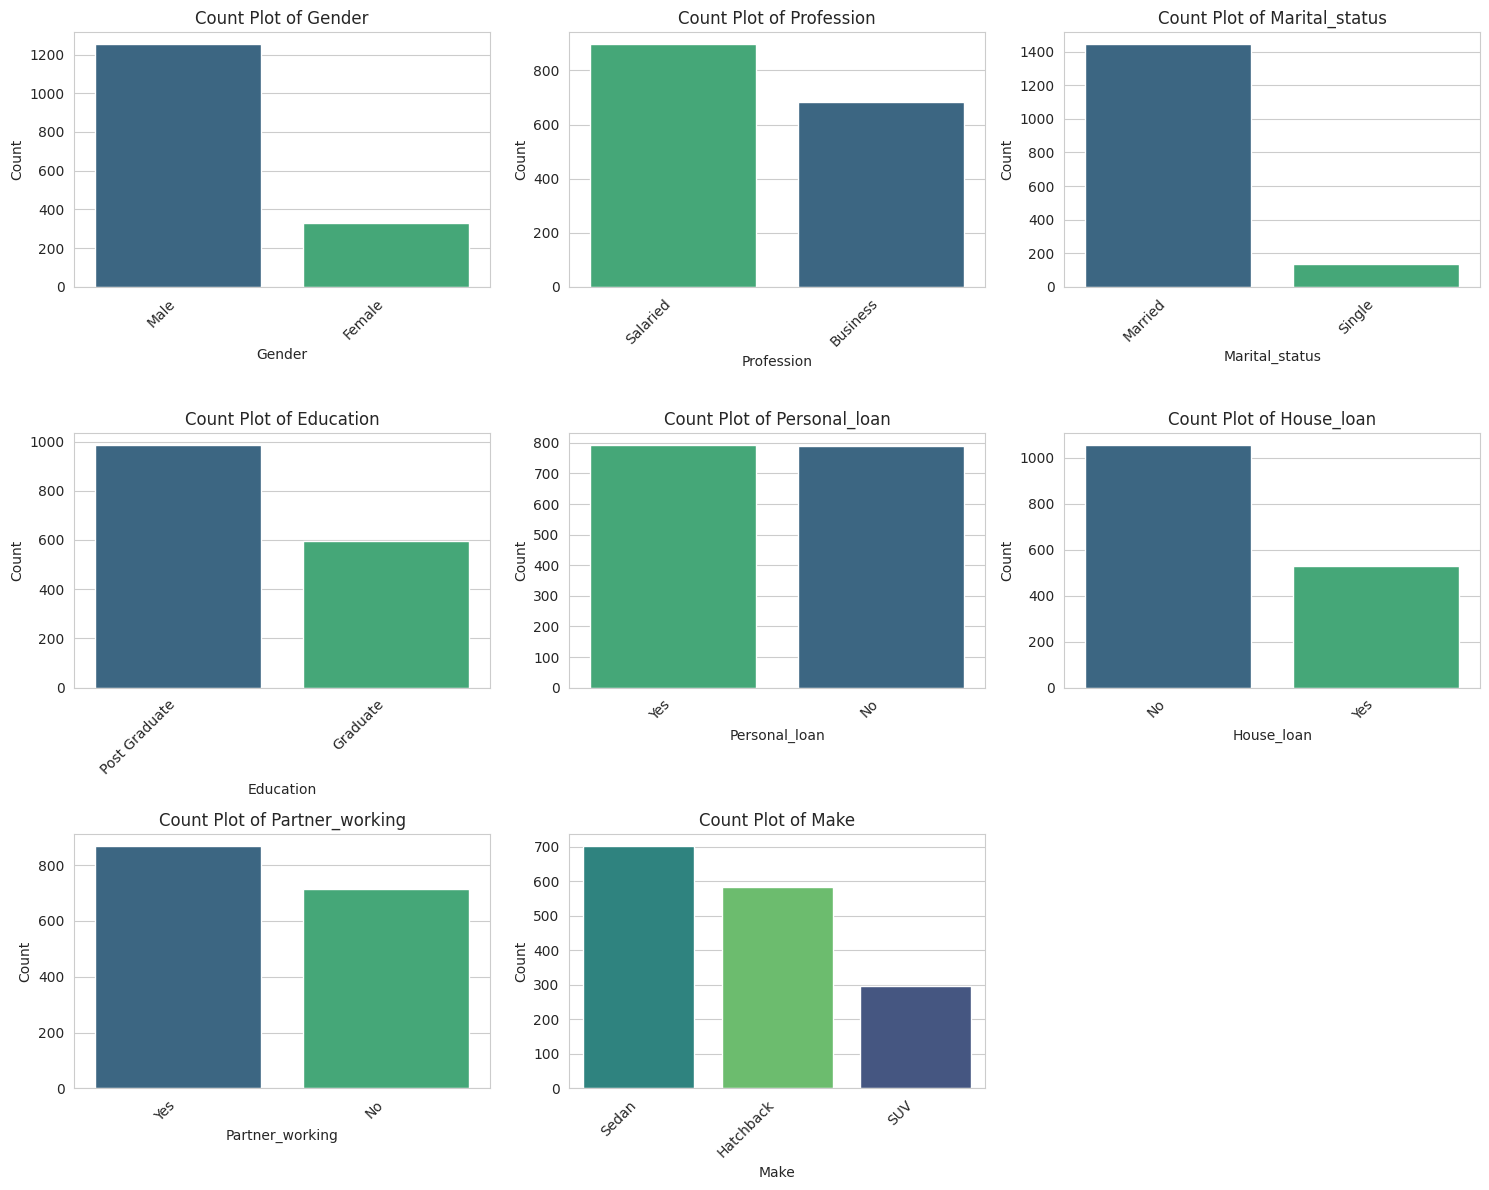

In [50]:
print("\nUnivariate Analysis - Categorical Variables:")
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, data=data, palette='viridis', hue=col, legend=False, order=data[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

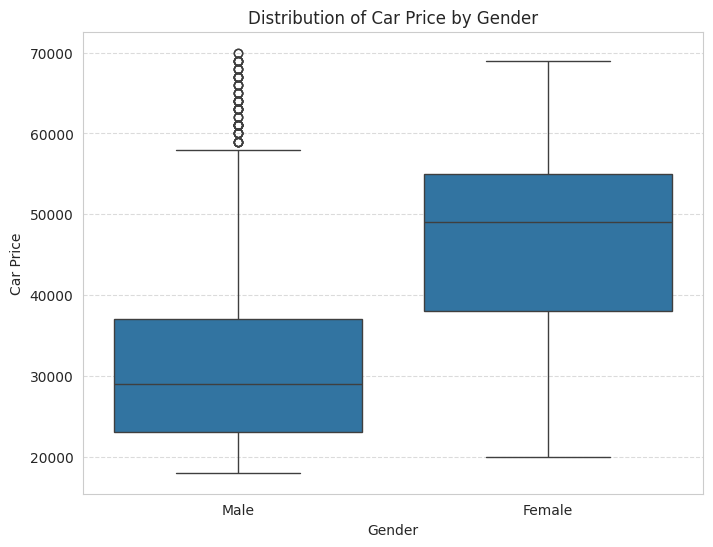

In [61]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Price', data=data)
plt.title('Distribution of Car Price by Gender')
plt.xlabel('Gender')
plt.ylabel('Car Price')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a grid for better readability
plt.savefig('boxplot_price_by_gender.png')
plt.show()

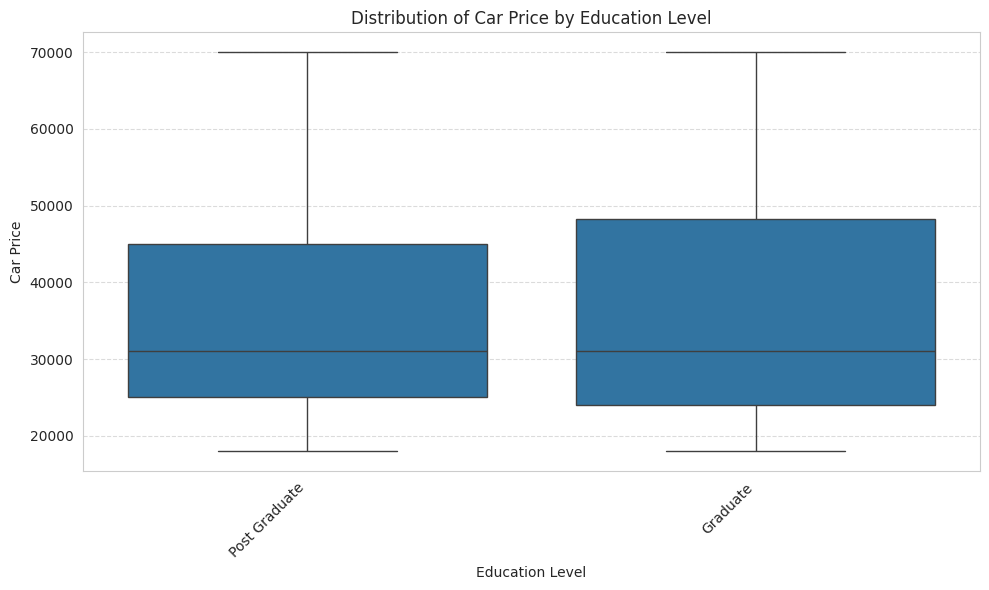

In [62]:
plt.figure(figsize=(10, 6)) # Adjust figure size for potentially more categories
sns.boxplot(x='Education', y='Price', data=data)
plt.title('Distribution of Car Price by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Car Price')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a grid for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.savefig('boxplot_price_by_education.png')
plt.show()

Bivariate Analysis


Correlation Matrix of Numerical Variables:


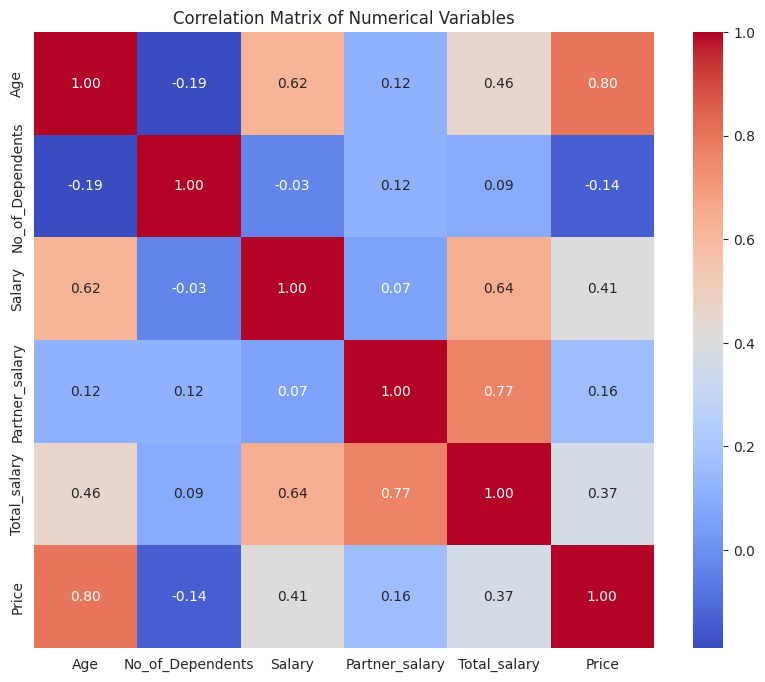

In [51]:
# Explore the relationship between all numerical variables - Correlation Matrix
print("\nCorrelation Matrix of Numerical Variables:")
correlation_matrix = data[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


Pair Plots of Selected Numerical Variables:


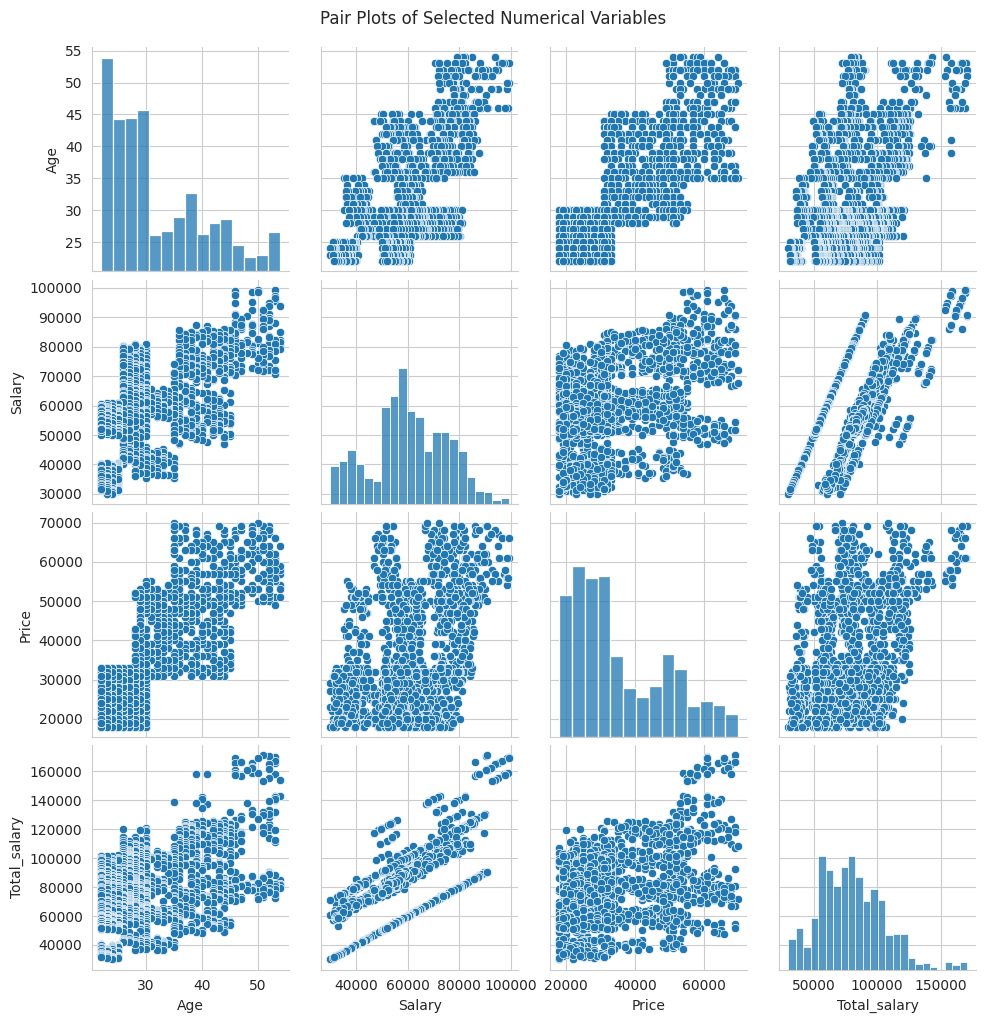

In [52]:
selected_numerical_cols = ['Age', 'Salary', 'Price', 'Total_salary']
print("\nPair Plots of Selected Numerical Variables:")
sns.pairplot(data[selected_numerical_cols])
plt.suptitle('Pair Plots of Selected Numerical Variables', y=1.02)
plt.show()

# Selecting a subset of numerical columns for pair plot to avoid high computation time for large datasets.

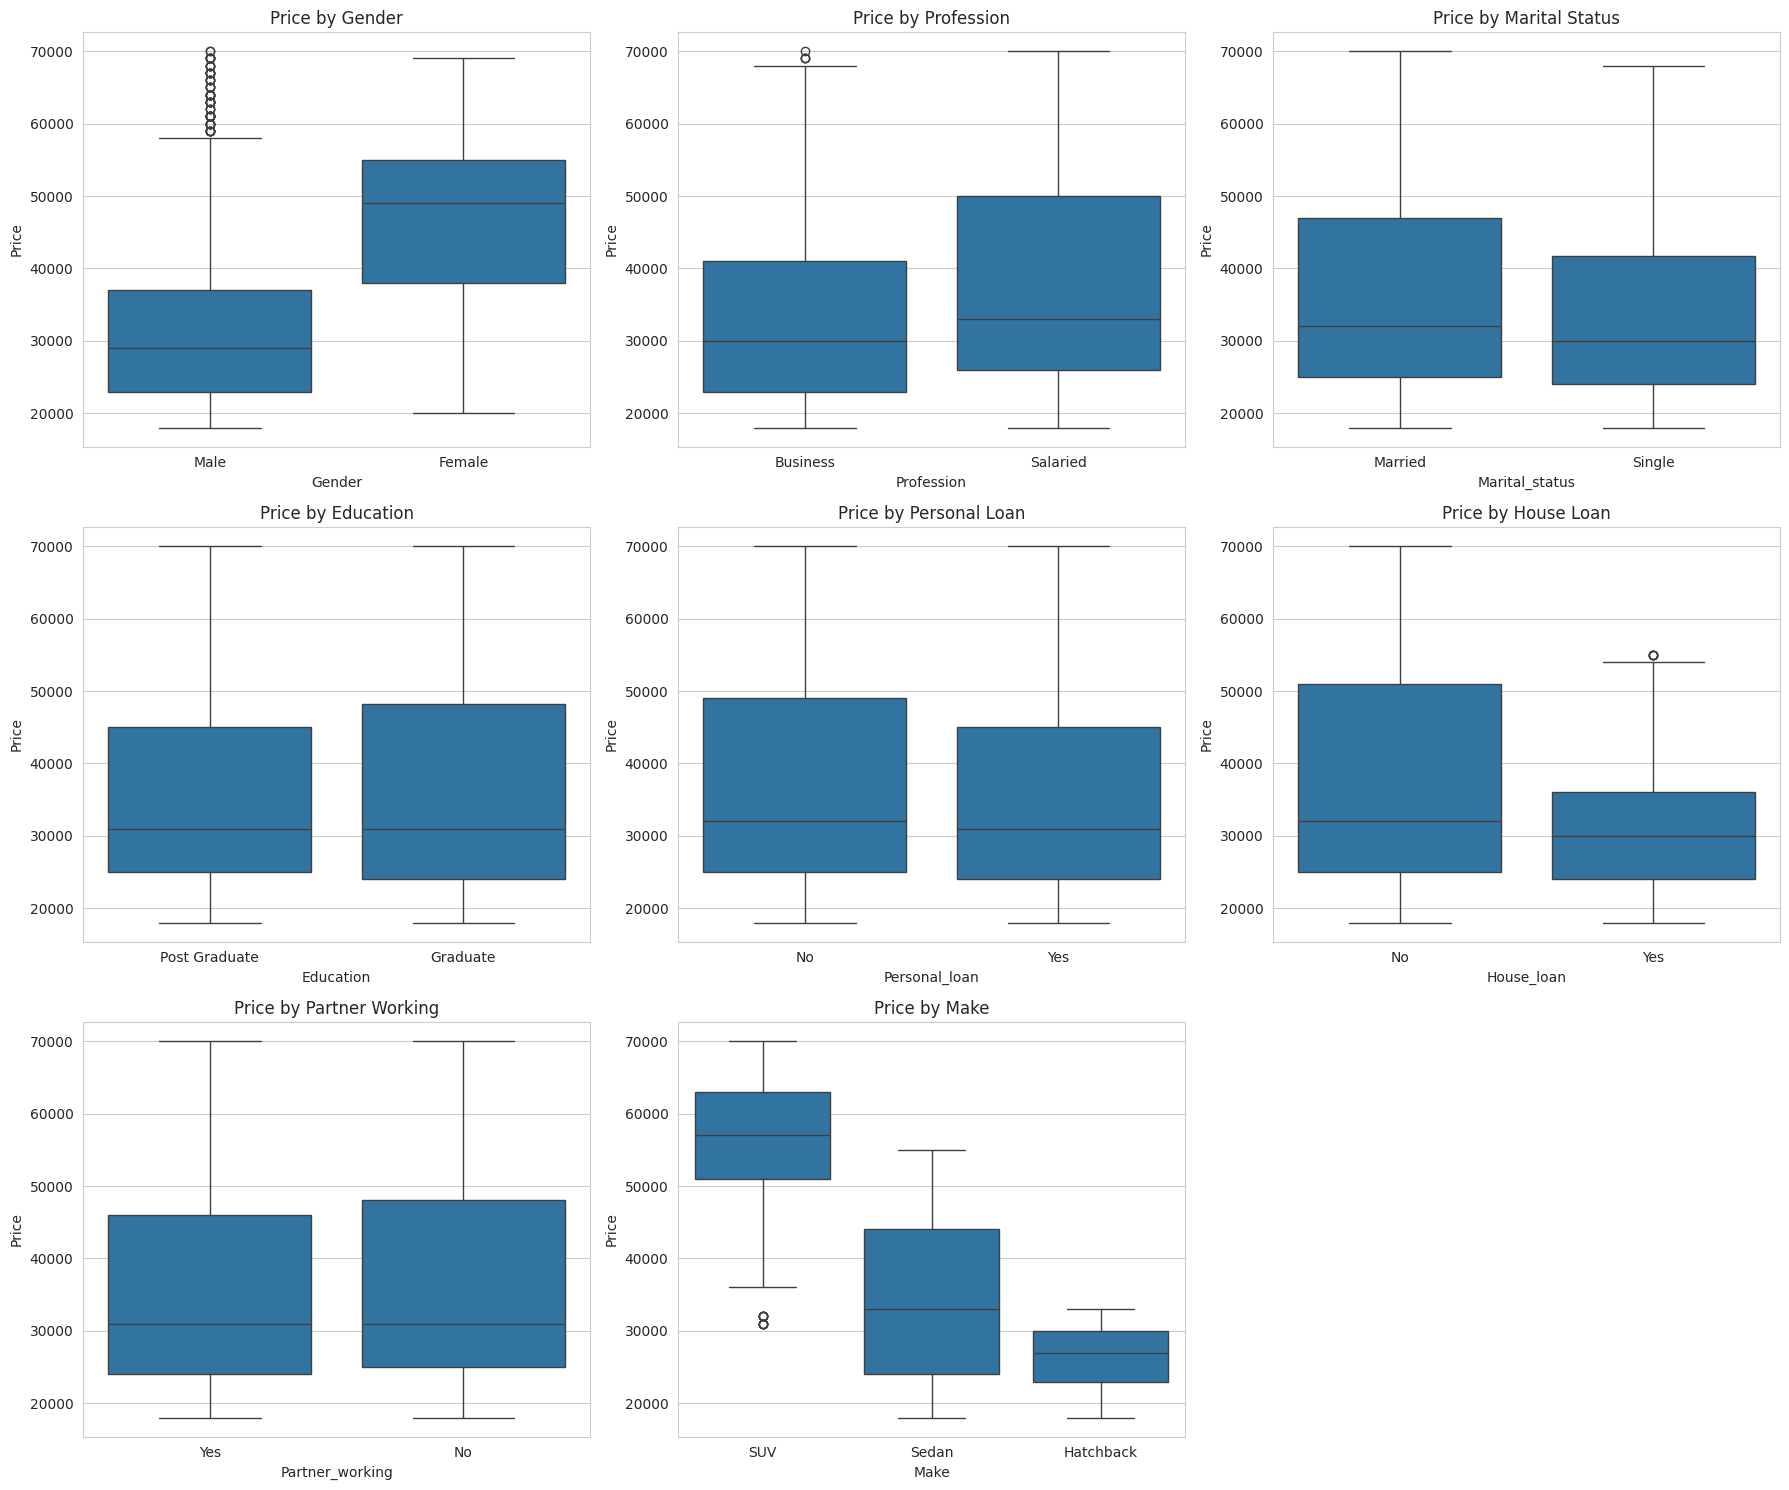

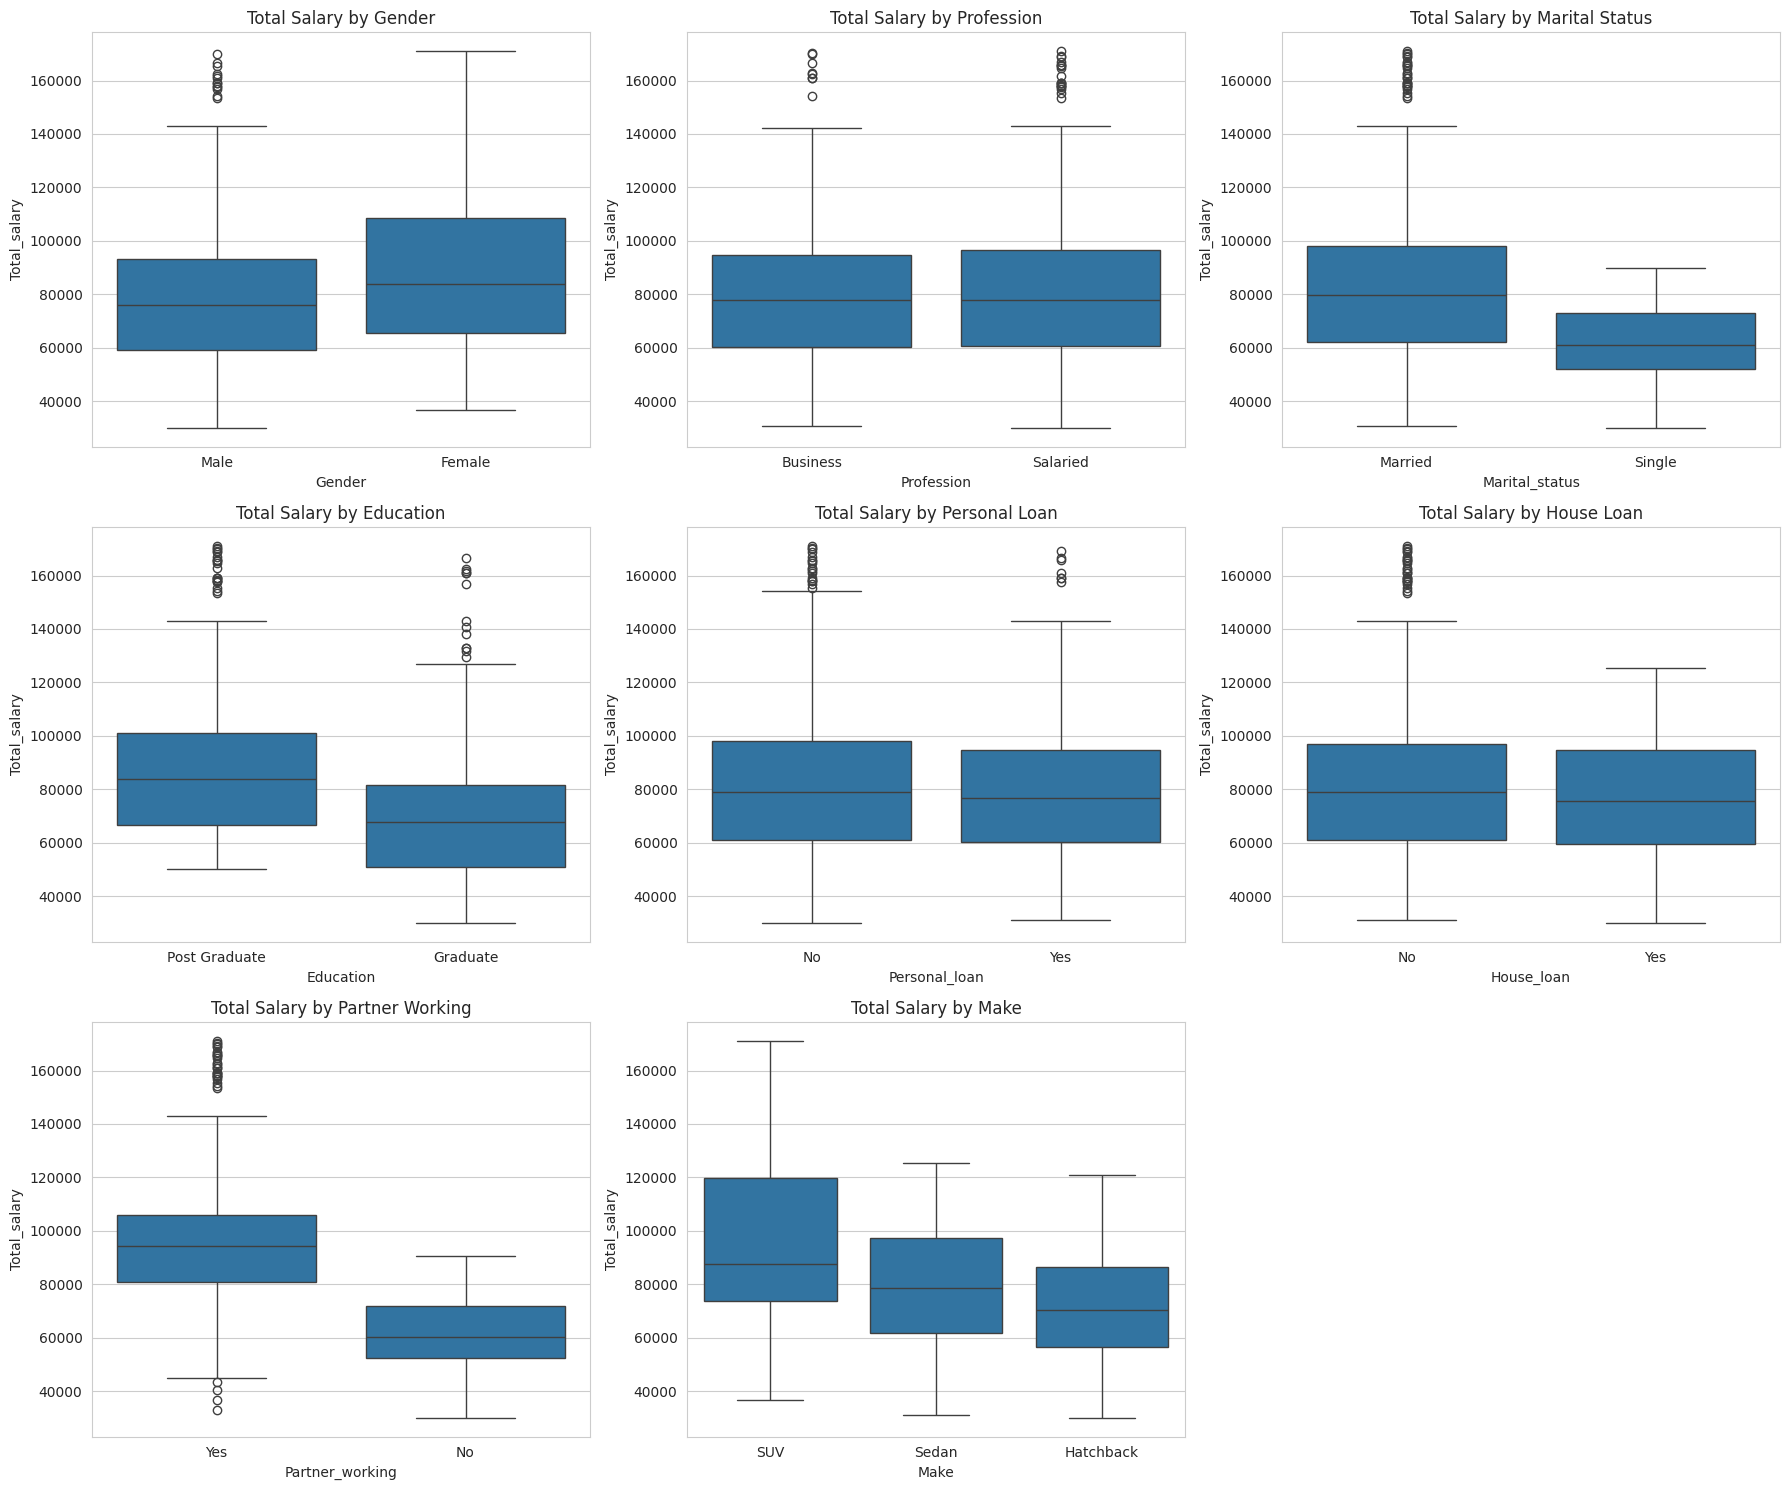

In [53]:
# Examples using box plots for key numerical vs categorical variables
plt.figure(figsize=(18, 15))

plt.subplot(3, 3, 1)
sns.boxplot(x='Gender', y='Price', data=data)
plt.title('Price by Gender')

plt.subplot(3, 3, 2)
sns.boxplot(x='Profession', y='Price', data=data)
plt.title('Price by Profession')

plt.subplot(3, 3, 3)
sns.boxplot(x='Marital_status', y='Price', data=data)
plt.title('Price by Marital Status')

plt.subplot(3, 3, 4)
sns.boxplot(x='Education', y='Price', data=data)
plt.title('Price by Education')

plt.subplot(3, 3, 5)
sns.boxplot(x='Personal_loan', y='Price', data=data)
plt.title('Price by Personal Loan')

plt.subplot(3, 3, 6)
sns.boxplot(x='House_loan', y='Price', data=data)
plt.title('Price by House Loan')

plt.subplot(3, 3, 7)
sns.boxplot(x='Partner_working', y='Price', data=data)
plt.title('Price by Partner Working')

plt.subplot(3, 3, 8)
sns.boxplot(x='Make', y='Price', data=data)
plt.title('Price by Make')

plt.tight_layout()
plt.show()

# Also checking the impact of categorical variables on Total_salary
plt.figure(figsize=(18, 15))

plt.subplot(3, 3, 1)
sns.boxplot(x='Gender', y='Total_salary', data=data)
plt.title('Total Salary by Gender')

plt.subplot(3, 3, 2)
sns.boxplot(x='Profession', y='Total_salary', data=data)
plt.title('Total Salary by Profession')

plt.subplot(3, 3, 3)
sns.boxplot(x='Marital_status', y='Total_salary', data=data)
plt.title('Total Salary by Marital Status')

plt.subplot(3, 3, 4)
sns.boxplot(x='Education', y='Total_salary', data=data)
plt.title('Total Salary by Education')

plt.subplot(3, 3, 5)
sns.boxplot(x='Personal_loan', y='Total_salary', data=data)
plt.title('Total Salary by Personal Loan')

plt.subplot(3, 3, 6)
sns.boxplot(x='House_loan', y='Total_salary', data=data)
plt.title('Total Salary by House Loan')

plt.subplot(3, 3, 7)
sns.boxplot(x='Partner_working', y='Total_salary', data=data)
plt.title('Total Salary by Partner Working')

plt.subplot(3, 3, 8)
sns.boxplot(x='Make', y='Total_salary', data=data)
plt.title('Total Salary by Make')

plt.tight_layout()
plt.show()

# Question 1: Do men tend to prefer SUVs more compared to women?

In [54]:
gender_make_preference = data.groupby(['Gender', 'Make']).size().unstack(fill_value=0)
print("Car Make Preference by Gender:\n", gender_make_preference)

gender_total_cars = gender_make_preference.sum(axis=1)
men_suv_percentage = (gender_make_preference.loc['Male', 'SUV'] / gender_total_cars.loc['Male']) * 100 if 'Male' in gender_total_cars.index else 0
women_suv_percentage = (gender_make_preference.loc['Female', 'SUV'] / gender_total_cars.loc['Female']) * 100 if 'Female' in gender_total_cars.index else 0
print(f"\nPercentage of SUVs bought by Men: {men_suv_percentage:.2f}%")
print(f"Percentage of SUVs bought by Women: {women_suv_percentage:.2f}%")

Car Make Preference by Gender:
 Make    Hatchback  SUV  Sedan
Gender                       
Female         15  173    141
Male          567  124    561

Percentage of SUVs bought by Men: 9.90%
Percentage of SUVs bought by Women: 52.58%


# Question 2: What is the likelihood of a salaried person buying a Sedan?

In [55]:
salaried_data = data[data['Profession'] == 'Salaried']
salaried_sedan_count = salaried_data[salaried_data['Make'] == 'Sedan'].shape[0]
total_salaried = salaried_data.shape[0]
likelihood_salaried_sedan = (salaried_sedan_count / total_salaried) * 100 if total_salaried > 0 else 0
print(f"\nLikelihood of a salaried person buying a Sedan: {likelihood_salaried_sedan:.2f}%")


Likelihood of a salaried person buying a Sedan: 44.20%


# Question 3: What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?

In [56]:
salaried_male_data = data[(data['Profession'] == 'Salaried') & (data['Gender'] == 'Male')]
salaried_male_suv_count = salaried_male_data[salaried_male_data['Make'] == 'SUV'].shape[0]
salaried_male_sedan_count = salaried_male_data[salaried_male_data['Make'] == 'Sedan'].shape[0]
print(f"\nNumber of SUVs bought by Salaried Males: {salaried_male_suv_count}")
print(f"Number of Sedans bought by Salaried Males: {salaried_male_sedan_count}")

# Compare average price for SUVs vs Sedans for salaried males
salaried_male_suv_price = salaried_male_data[salaried_male_data['Make'] == 'SUV']['Price'].mean()
salaried_male_sedan_price = salaried_male_data[salaried_male_data['Make'] == 'Sedan']['Price'].mean()
print(f"Average SUV Price for Salaried Males: {salaried_male_suv_price:.2f}")
print(f"Average Sedan Price for Salaried Males: {salaried_male_sedan_price:.2f}")


Number of SUVs bought by Salaried Males: 90
Number of Sedans bought by Salaried Males: 305
Average SUV Price for Salaried Males: 58377.78
Average Sedan Price for Salaried Males: 33383.61


# Question 4: How does the amount spent on purchasing automobiles vary by gender?

In [57]:
price_by_gender = data.groupby('Gender')['Price'].mean()
print("\nAverage Amount Spent on Automobiles by Gender:\n", price_by_gender)


Average Amount Spent on Automobiles by Gender:
 Gender
Female    47705.167173
Male      32416.134185
Name: Price, dtype: float64


# Question 5: How much money was spent on purchasing automobiles by individuals who took a personal loan?

In [58]:
personal_loan_buyers = data[data['Personal_loan'] == 'Yes']
total_spent_personal_loan = personal_loan_buyers['Price'].sum()
print(f"\nTotal money spent on automobiles by individuals with a personal loan: {total_spent_personal_loan:.2f}")


Total money spent on automobiles by individuals with a personal loan: 27290000.00


# Question 6: How does having a working partner influence the purchase of higher-priced cars?

In [59]:
price_by_partner_working = data.groupby('Partner_working')['Price'].mean()
print("\nAverage Price of Cars by Partner Working Status:\n", price_by_partner_working)


Average Price of Cars by Partner Working Status:
 Partner_working
No     36000.000000
Yes    35267.281106
Name: Price, dtype: float64


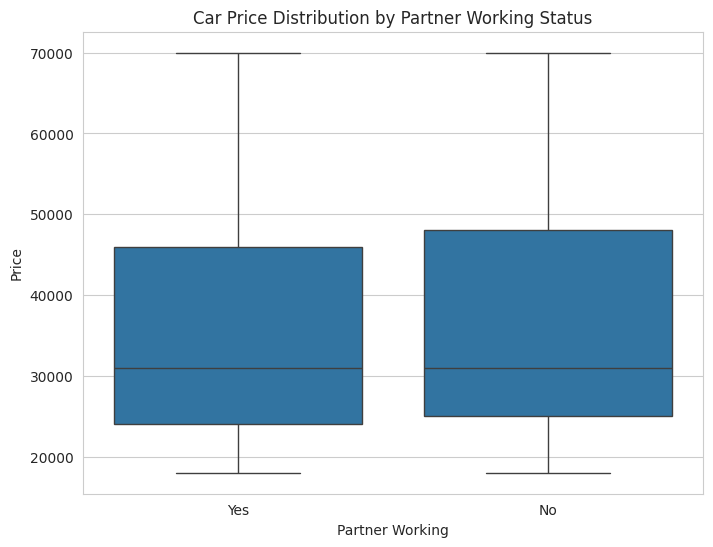

In [60]:
# To further analyze, we can compare the distribution of prices
plt.figure(figsize=(8, 6))
sns.boxplot(x='Partner_working', y='Price', data=data)
plt.title('Car Price Distribution by Partner Working Status')
plt.xlabel('Partner Working')
plt.ylabel('Price')
plt.show()